# Classification algorithm

In [1]:
import pandas as pd # for data importing and data manipulation
from sklearn.model_selection import train_test_split #splits the data into traning data and testing data 
from sklearn.preprocessing import StandardScaler #scales the data into the range such as 0 to 1
from sklearn.linear_model import LogisticRegression #inbuilt module which can apply logistic classification on given dataset
from sklearn.metrics import confusion_matrix, classification_report#use to plot confusion metrixs
import matplotlib.pyplot as plt #used for data visualisation
import seaborn as sns #use for data visualization

In [2]:
# Load the dataset using pandas library
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Display the first few rows of the dataset by default it display only 5 rows. 
print(data.head())


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [4]:
# Check for missing values and data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [5]:
# Check summary statistics
print(data.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [6]:
#here we have only two categorical values so lets find the unique values or categories they are divided in.
a=data.country.unique()
b=data.gender.unique()
print(a)
print(b)

['France' 'Spain' 'Germany']
['Female' 'Male']


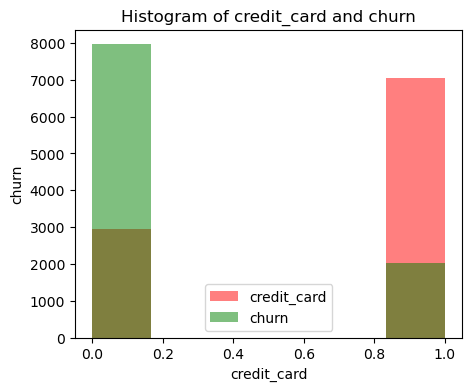

In [7]:
#lets plot the histogram to analyse the relationship between dependent and independent variable. 
plt.figure(figsize=(5, 4))
plt.hist(data['credit_card'], bins=6, alpha=0.5, label='credit_card',color='red')
plt.hist(data['churn'], bins=6, alpha=0.5, label='churn',color='green')
plt.xlabel('credit_card')
plt.ylabel('churn')
plt.title('Histogram of credit_card and churn')
plt.legend()
plt.show()

<Axes: xlabel='active_member', ylabel='Count'>

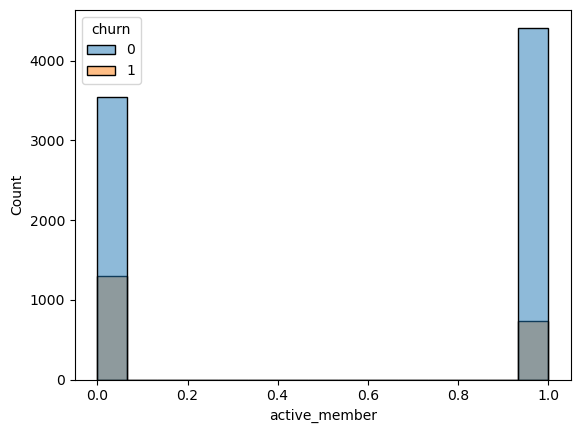

In [8]:
sns.histplot(
    data=data,
    x="active_member",
    hue="churn")

C:\Users\HP\AppData\Local\Temp\ipykernel_14672\1589010791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=data["credit_score"],hist=True, kde=False, rug=False )


<Axes: xlabel='credit_score'>

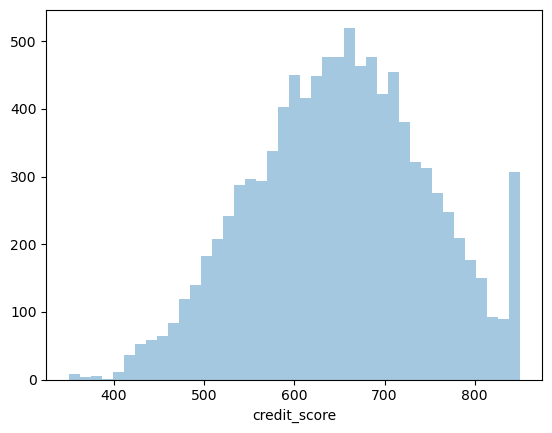

In [9]:
sns.distplot( a=data["credit_score"],hist=True, kde=False, rug=False )

In [10]:
#lets first convert the categorical object datatype into numeric value using pandas
data['gender'] = pd.factorize(data['gender'])[0] # here there are two unique values. female = 0 and male = 1

In [11]:
data['country'] = pd.factorize(data['country'])[0] # we have three unique values France = 0, Spain = 1, Germany = 2 
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,1,42,3,75075.31,2,1,0,92888.52,1


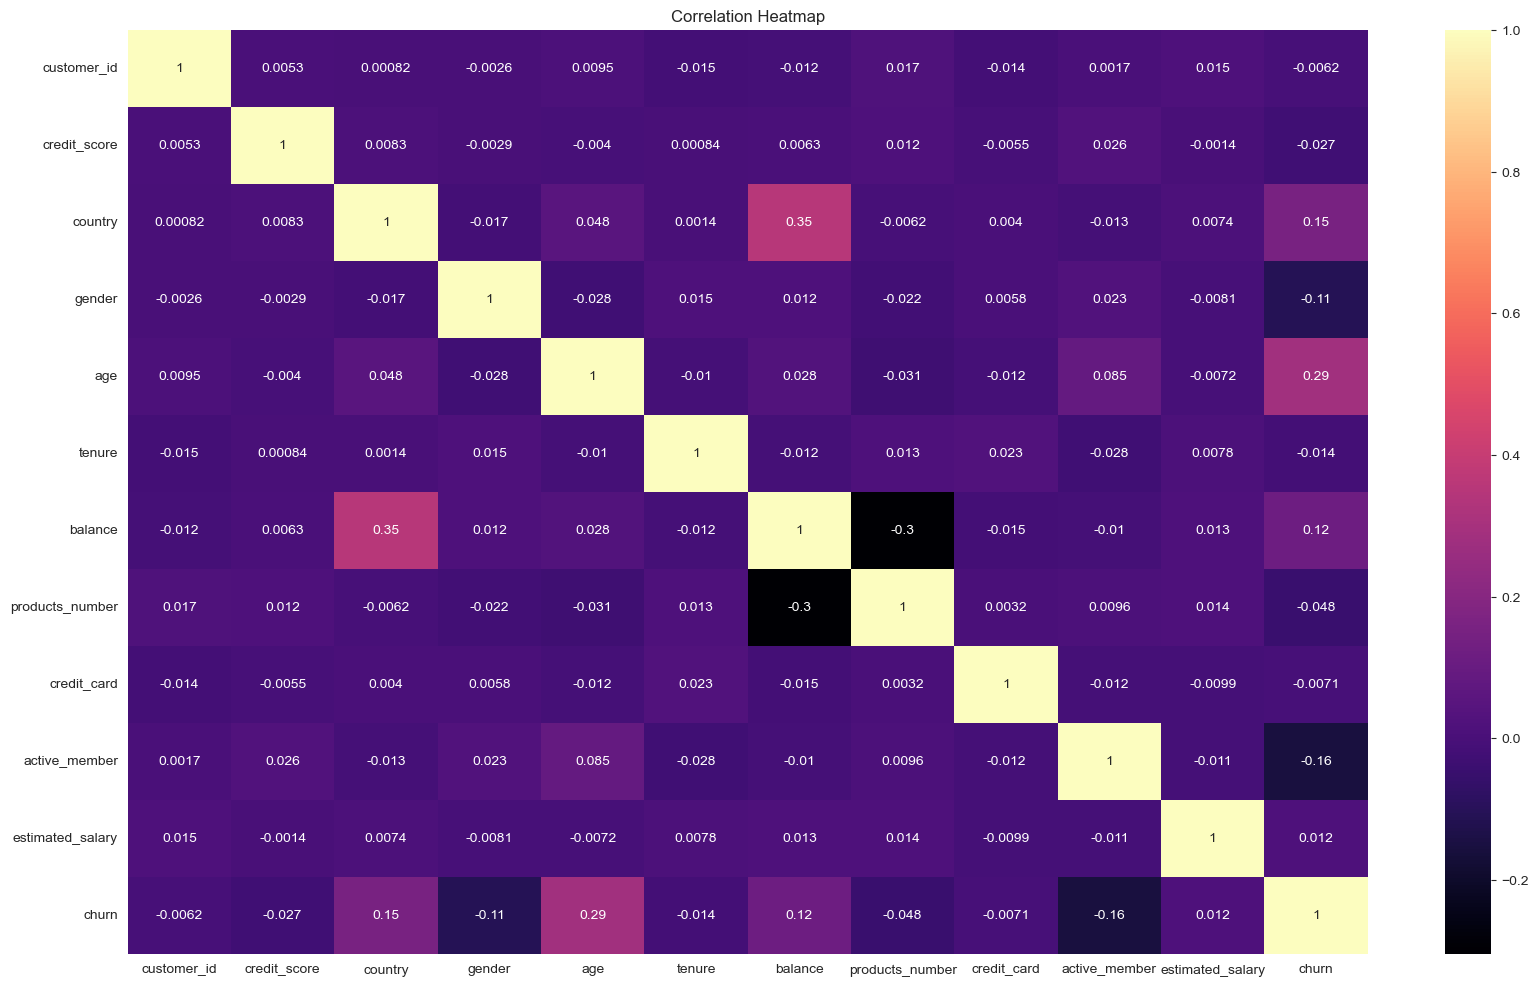

In [12]:
#heatmap is used to show the correlation between the features
correlation_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.set_style("darkgrid")
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

# a] Logistic regression

In [13]:
# we have seprated the target variable and dependent variables 
X = data.drop('churn', axis=1) # churn is target variable so we have droped the target variable and stored it in x variable
y = data['churn'] # we have stored churn target variable in y variable

In [14]:
#we have divided data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 20% dataset is test data and 80% data is train data. So the ratio is 1:4.

In [15]:
X_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,15601116,686,0,1,32,6,0.00,2,1,1,179093.26
1561,15766374,632,2,1,42,4,119624.60,2,1,1,195978.86
1670,15716994,559,1,1,24,3,114739.92,1,1,0,85891.02
6087,15730759,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,15797900,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,15681075,682,0,0,58,1,0.00,1,1,1,706.50
5390,15573851,735,0,0,38,1,0.00,3,0,0,92220.12
860,15807663,667,0,1,43,8,190227.46,1,1,0,97508.04


In [16]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: churn, Length: 2000, dtype: int64

In [17]:
# next step is to scale the data to fit the data into the model 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)


In [20]:
#now to evalute the model, we will generate classification report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [21]:
# lets create a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1544   63]
 [ 308   85]]


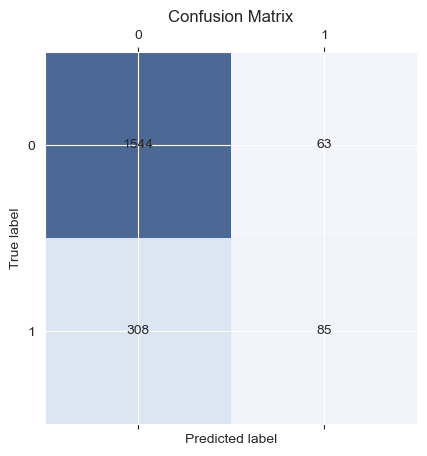

In [22]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.01097962 -0.0683618   0.30533369 -0.26698342  0.75372314 -0.04184006
   0.19143414 -0.05514807 -0.00815039 -0.53521936  0.0161801 ]]
Intercept: [-1.63502276]


In [24]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
             Feature  Importance
4                age    0.753723
2            country    0.305334
6            balance    0.191434
10  estimated_salary    0.016180
8        credit_card   -0.008150
0        customer_id   -0.010980
5             tenure   -0.041840
7    products_number   -0.055148
1       credit_score   -0.068362
3             gender   -0.266983
9      active_member   -0.535219


# b] Suport vector machine 

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
from sklearn import svm
import numpy as np

In [27]:
age= data['age']
credit_score = data['credit_score']


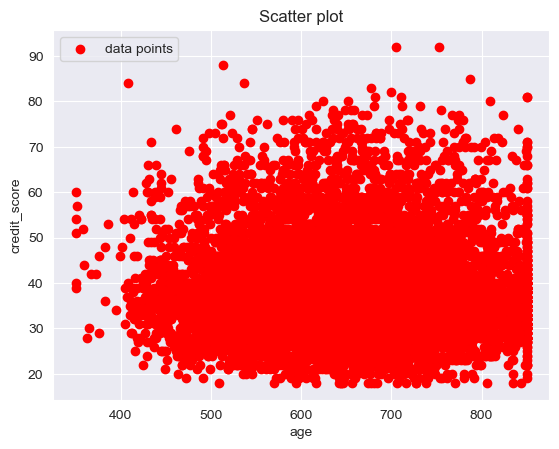

In [28]:
plt.scatter(credit_score,age,color='red',label='data points')
plt.xlabel('age')
plt.ylabel('credit_score')
plt.title("Scatter plot")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#regularization
# Regualization refers to how much you want to avoid misclassification of each training data point.
# c--> large : chances of overfit
# c--> Small : chances of underfit 
model_c = SVC(C=1)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.855

In [30]:
#Gamma 
#Defines how far the data points are from hyperplane
#low gamma --> points are far away 
#High gamma --> points are close 

model_g = SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.8035

In [31]:
#Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train,y_train)
model_linear_kernal.score(X_test,y_test)

0.8035

In [32]:
# Training the SVM model
svm_model = SVC(kernel='linear',C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [33]:
# Predictions
y_pred = svm_model.predict(X_test)


In [34]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8035

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Confusion Matrix:
 [[1607    0]
 [ 393    0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# c] Decision tree

Decision tree classification is a powerful machine learning technique with the following key points:

1. Decision trees are non-parametric supervised learning models used for classification and regression tasks.
2. They organize data into a tree-like structure where each internal node represents a feature, each branch represents a decision, and each leaf node represents an outcome.
3. The decision-making process starts at the root node and progresses down the tree based on feature values until a leaf node is reached.
4. Splitting criteria such as Gini impurity or entropy are used to determine the best feature to split the data at each node.
5. Decision trees are interpretable and easy to visualize, making them useful for understanding the underlying patterns in the data.
6. However, decision trees are prone to overfitting, especially with complex datasets and deep trees.
7. Techniques like pruning, limiting the tree depth, and using ensemble methods like random forests can help mitigate overfitting.
8. Decision trees are versatile and can handle both numerical and categorical data without the need for feature scaling.
9. They can also handle missing values by making decisions based on available data.
10. Decision tree classification is widely used in various domains including finance, healthcare, marketing, and more due to its simplicity and interpretability.

In [36]:
#pip install scikit-learn graphviz

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

In [38]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.782

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.55      0.50       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000



In [41]:
from sklearn import tree

In [ ]:
X = X.columns.tolist()

In [43]:
X

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

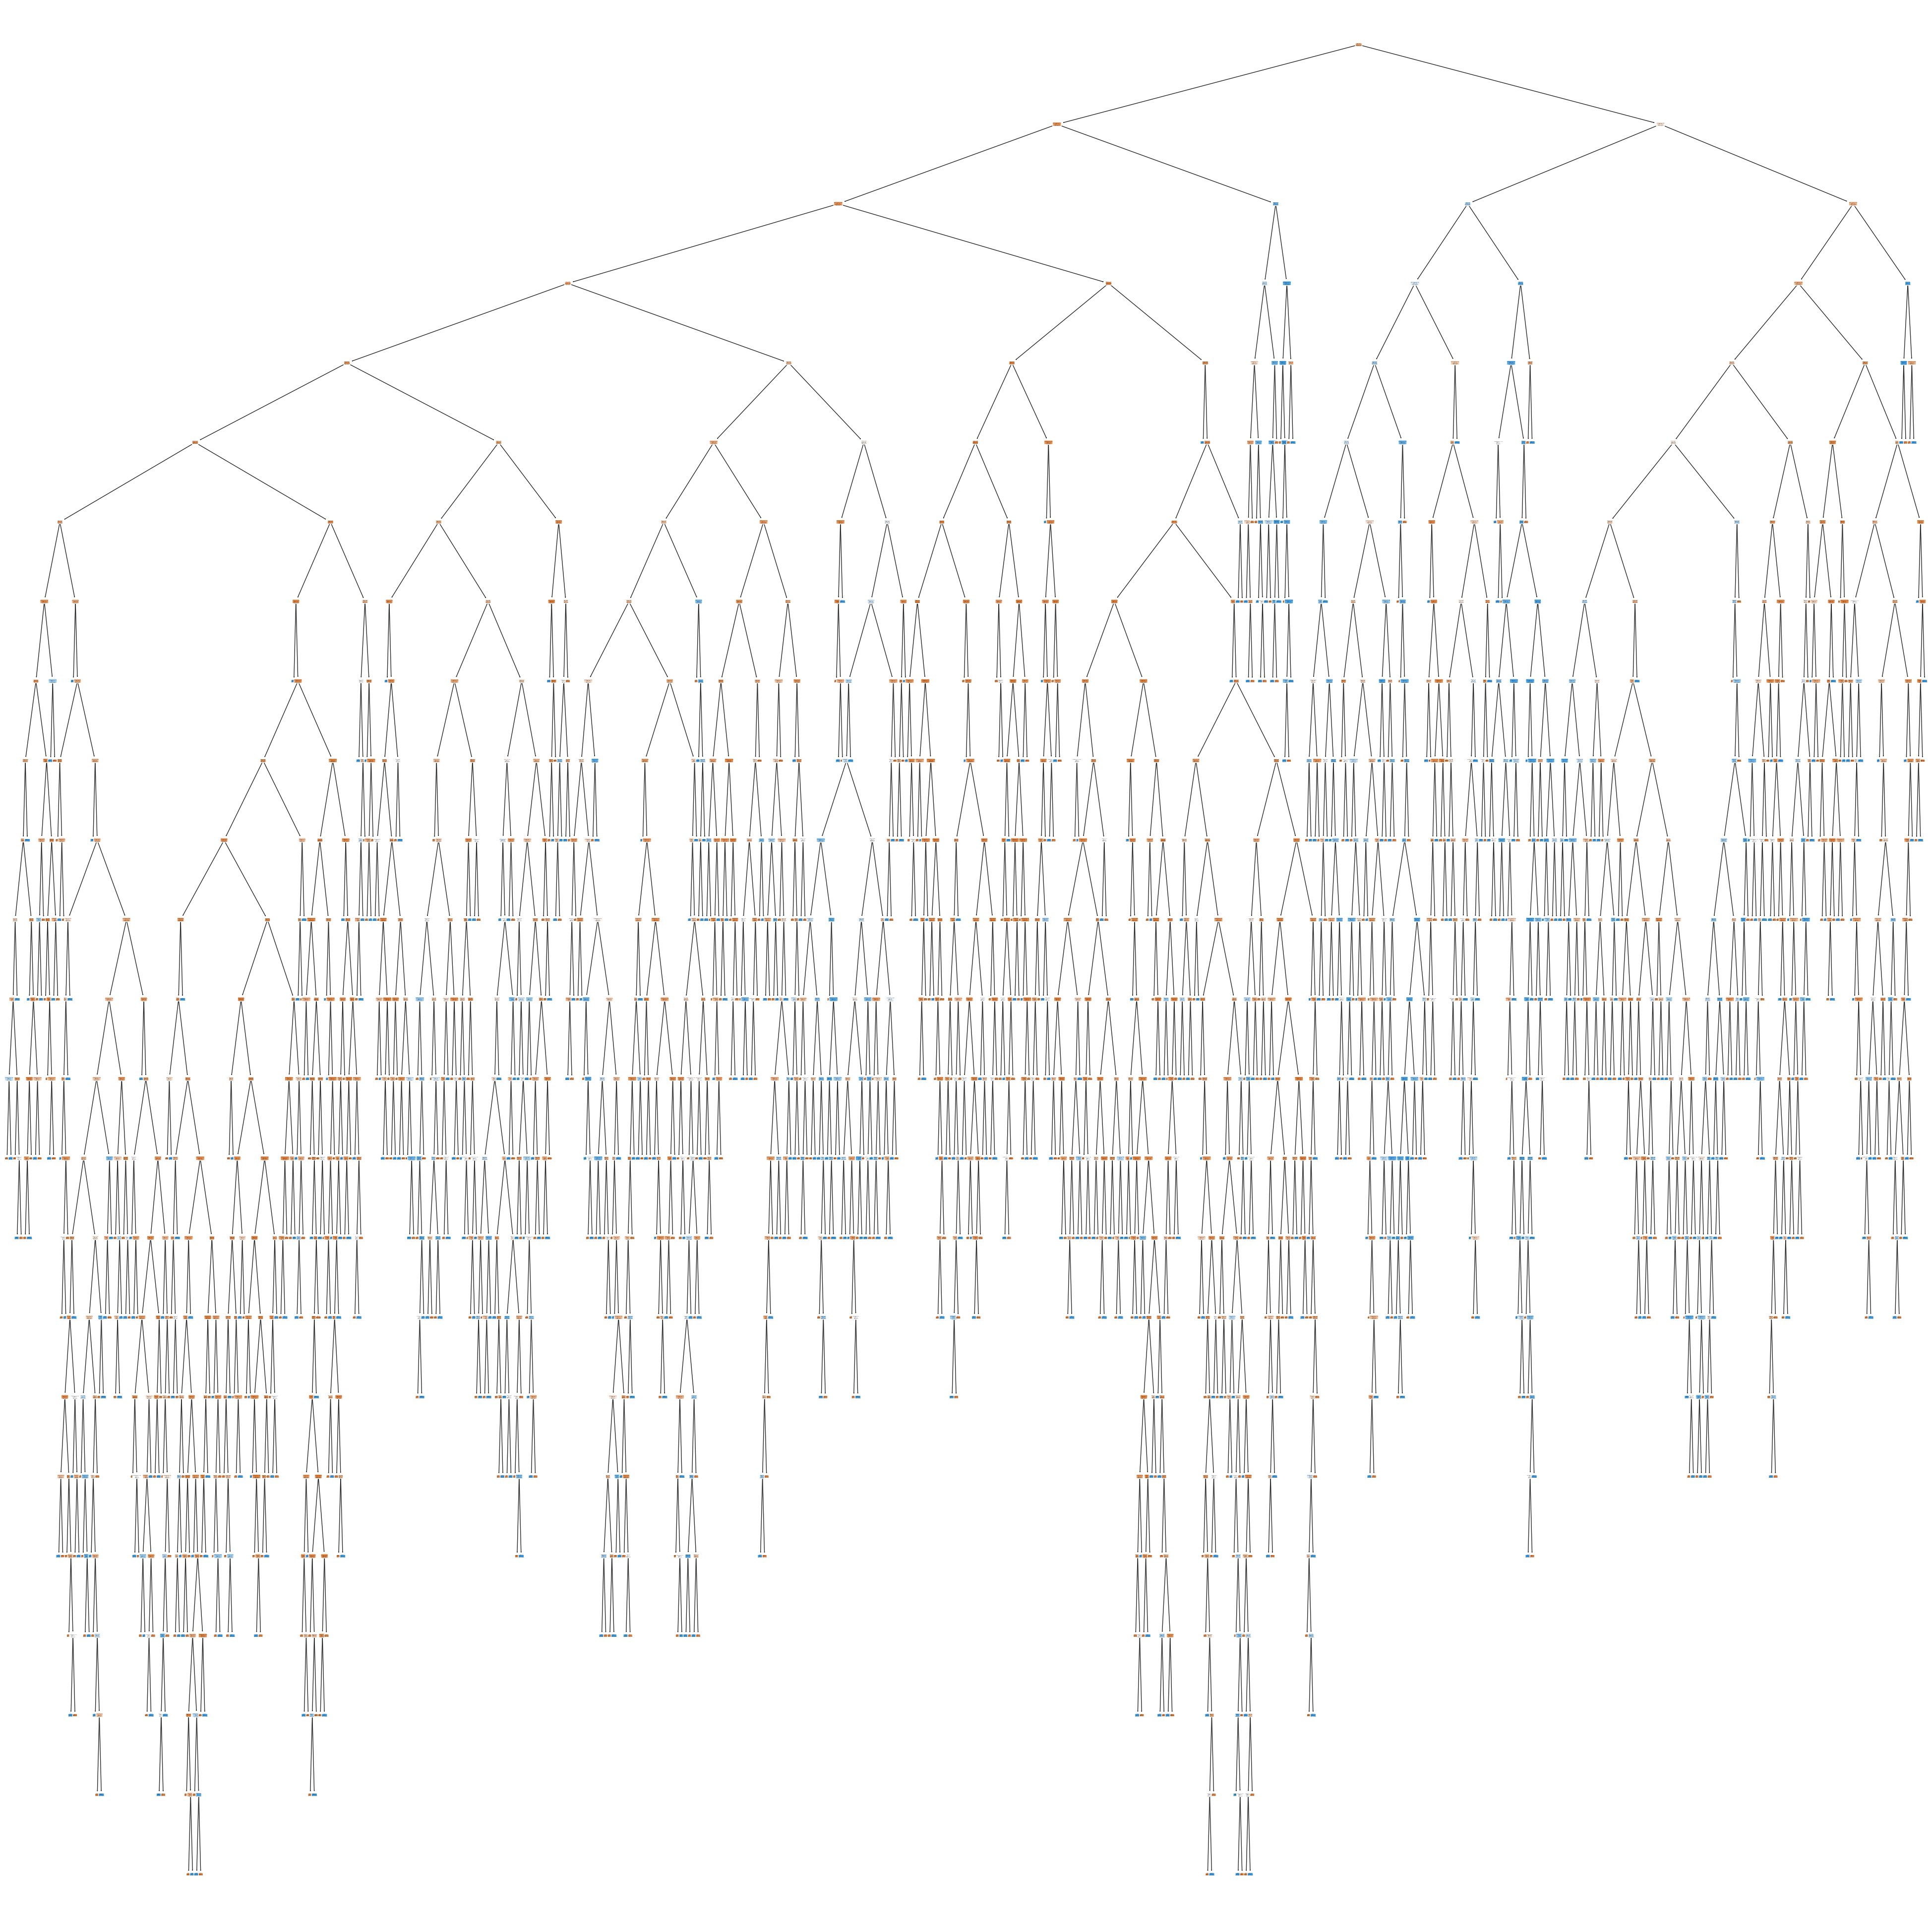

In [51]:
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, feature_names=list(X), class_names=['churn','not churn'], rounded = True)
plt.show()

The accuracy of decision tree classifier is 78%.

# d] Random forest classifier

Random Forest is an ensemble learning technique that builds multiple decision trees and combines their predictions to make more accurate and robust predictions. Each tree in the forest is built using a random subset of the training data and a random subset of the features. The randomness introduced in tree construction helps to reduce overfitting and improve generalization to unseen data. During prediction, each tree in the forest independently predicts the target variable, and the final prediction is typically the mode (for classification) or the average (for regression) of the individual tree predictions. Random Forest is widely used due to its simplicity, flexibility, and effectiveness in handling high-dimensional data with complex relationships. It performs well on a variety of datasets without extensive tuning of hyperparameters. Additionally, Random Forest provides estimates of feature importance, which can help identify the most informative features in the dataset. However, Random Forest may be computationally expensive and less interpretable compared to single decision trees.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Create and train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predictions
y_pred = clf.predict(X_test)

In [67]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.869

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



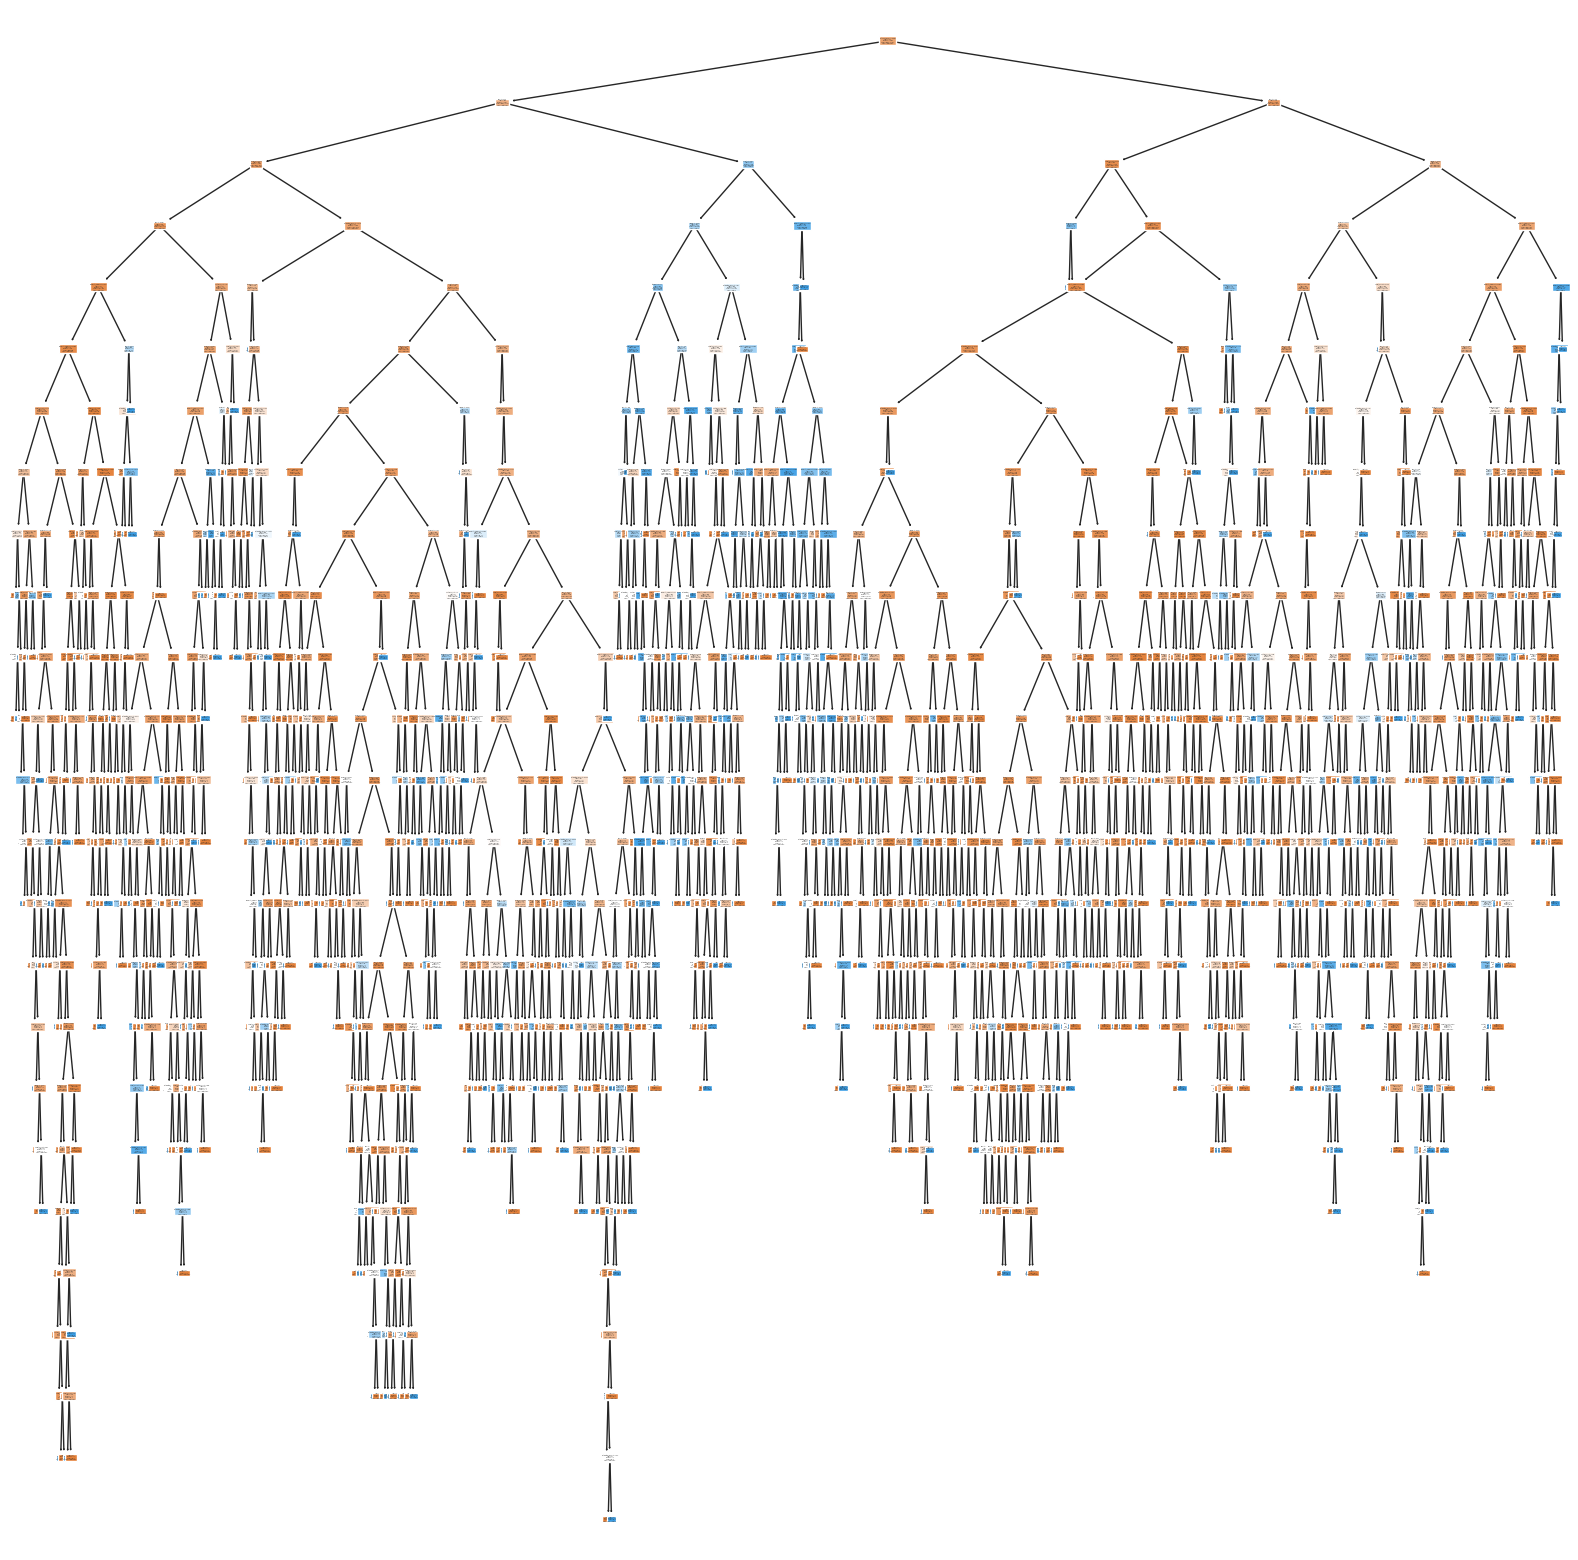

In [64]:
# Draw one of the trees in the forest
plt.figure(figsize=(20,20))
tree.plot_tree(clf.estimators_[0], filled=True, feature_names=list(X), class_names=['Not Churn', 'Churn'])
plt.show()

The accuracy of random forest classifier is 87%.

# e] Naive bayes

# f] K-Nearest Neighbors (KNN)